# Import Library

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [0]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [0]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [0]:
model = Sequential()

In [0]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.add(Dropout(rate=0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
#卷積層2與池化層2

In [0]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [0]:
model.add(Dropout(0.25))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [0]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [0]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [0]:
model.add(Dense(10, activation='softmax'))

In [20]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [21]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

# 作業: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

train_history_cateCross=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)          

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 26s 641us/step - loss: 1.8130 - acc: 0.3425 - val_loss: 1.6097 - val_acc: 0.4585
Epoch 2/10
40000/40000 [==============================] - 23s 579us/step - loss: 1.4474 - acc: 0.4796 - val_loss: 1.3839 - val_acc: 0.5380
Epoch 3/10
40000/40000 [==============================] - 23s 574us/step - loss: 1.2948 - acc: 0.5388 - val_loss: 1.3056 - val_acc: 0.5797
Epoch 4/10
40000/40000 [==============================] - 23s 576us/step - loss: 1.1869 - acc: 0.5805 - val_loss: 1.2090 - val_acc: 0.6155
Epoch 5/10
40000/40000 [==============================] - 23s 576us/step - loss: 1.1010 - acc: 0.6087 - val_loss: 1.1492 - val_acc: 0.6320
Epoch 6/10
40000/40000 [==============================] - 23s 574us/step - loss: 1.0311 - acc: 0.6362 - val_loss: 1.1074 - val_acc: 0.6319
Epoch 7/10
40000/40000 [==============================] - 23s 575us/

In [27]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['categorical_accuracy'])

train_history_binaCross=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)          

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 24s 605us/step - loss: 0.0971 - categorical_accuracy: 0.8027 - val_loss: 0.1336 - val_categorical_accuracy: 0.7236
Epoch 2/10
40000/40000 [==============================] - 24s 588us/step - loss: 0.0967 - categorical_accuracy: 0.8007 - val_loss: 0.1313 - val_categorical_accuracy: 0.7318
Epoch 3/10
40000/40000 [==============================] - 23s 585us/step - loss: 0.0954 - categorical_accuracy: 0.8052 - val_loss: 0.1322 - val_categorical_accuracy: 0.7304
Epoch 4/10
40000/40000 [==============================] - 23s 584us/step - loss: 0.0932 - categorical_accuracy: 0.8107 - val_loss: 0.1315 - val_categorical_accuracy: 0.7297
Epoch 5/10
40000/40000 [==============================] - 23s 584us/step - loss: 0.0926 - categorical_accuracy: 0.8117 - val_loss: 0.1305 - val_categorical_accuracy: 0.7317
Epoch 6/10
40000/40000 [==============================] - 23s 583us/step - loss: 0.09

In [24]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

train_history_MSE=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)          

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 23s 570us/step - loss: 0.0291 - acc: 0.7922 - val_loss: 0.0387 - val_acc: 0.7269
Epoch 2/10
40000/40000 [==============================] - 22s 557us/step - loss: 0.0290 - acc: 0.7949 - val_loss: 0.0388 - val_acc: 0.7266
Epoch 3/10
40000/40000 [==============================] - 22s 558us/step - loss: 0.0287 - acc: 0.7977 - val_loss: 0.0390 - val_acc: 0.7240
Epoch 4/10
40000/40000 [==============================] - 22s 559us/step - loss: 0.0287 - acc: 0.7966 - val_loss: 0.0389 - val_acc: 0.7259
Epoch 5/10
40000/40000 [==============================] - 22s 559us/step - loss: 0.0286 - acc: 0.7997 - val_loss: 0.0385 - val_acc: 0.7334
Epoch 6/10
40000/40000 [==============================] - 22s 556us/step - loss: 0.0282 - acc: 0.8017 - val_loss: 0.0388 - val_acc: 0.7263
Epoch 7/10
40000/40000 [==============================] - 22s 558us/step - loss: 0.0280 - acc: 0.8031 - val_loss: 0.

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_acc):
    plt.plot(train_history_cateCross.history[train_acc])
    plt.plot(train_history_binaCross.history['categorical_accuracy'])
    plt.plot(train_history_MSE.history[train_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['categorical_crossentropy', 'binary_crossentropy', 'mean_squared_error'], loc='upper left')
    plt.show()

In [0]:
def show_test_history(test_acc):
    plt.plot(train_history_cateCross.history[test_acc])
    plt.plot(train_history_binaCross.history['categorical_accuracy'])
    plt.plot(train_history_MSE.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['categorical_crossentropy', 'binary_crossentropy', 'mean_squared_error'], loc='upper left')
    plt.show()

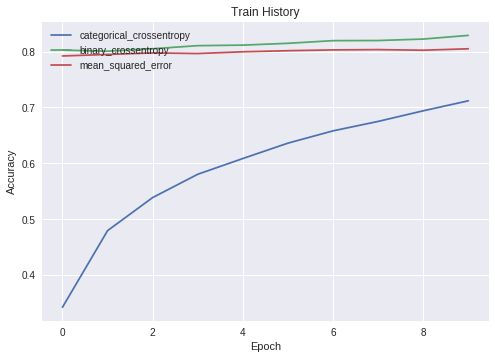

In [38]:
show_train_history('acc')

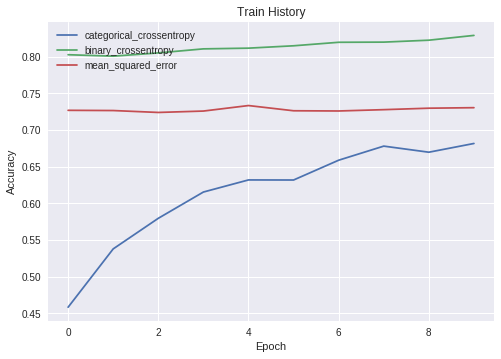

In [39]:
show_test_history('val_acc')